Problem Statement

The Toxic Pesticides

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to daetermine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.



Import Libraries

In [343]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Datasets

In [344]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/train_yaOffsB%20-%20train_yaOffsB.csv")
test=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/test_pFkWwen%20-%20test_pFkWwen.csv")
sample_sub=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/AV-Agriculture/master/sample_submission_O1oDc4H%20-%20sample_submission_O1oDc4H.csv")

In [345]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [346]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,NaN,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


In [347]:
sample_sub

,ID,Crop_Damage
0,F00000002,1
1,F00000011,1
2,F00000014,1
3,F00000015,1
4,F00000016,1
...,...,...
59305,F00155901,1
59306,F00155912,1
59307,F00155930,1
59308,F00155933,1


In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


In [349]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       59310 non-null  object 
 1   Estimated_Insects_Count  59310 non-null  int64  
 2   Crop_Type                59310 non-null  int64  
 3   Soil_Type                59310 non-null  int64  
 4   Pesticide_Use_Category   59310 non-null  int64  
 5   Number_Doses_Week        59310 non-null  int64  
 6   Number_Weeks_Used        53417 non-null  float64
 7   Number_Weeks_Quit        59310 non-null  int64  
 8   Season                   59310 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 4.1+ MB


In [350]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [351]:
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,59310.000000,59310.000000,59310.000000,59310.000000,59310.000000,53417.000000,59310.000000,59310.000000
mean,1397.014129,0.287068,0.455117,2.263227,25.851880,28.705094,9.528376,1.900877
std,849.425808,0.452397,0.497986,0.461733,15.481957,12.421211,9.855341,0.701934
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000


Check for missing values

In [352]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [353]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

Impute missing values

In [354]:
# fill up missing values with median
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median())
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].median())

In [355]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [356]:
train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
88853,F00155935,3337,1,0,2,10,12.0,44,3,0
88854,F00155938,3516,1,0,2,10,20.0,38,1,0
88855,F00155939,3516,1,0,2,15,40.0,8,2,0
88856,F00155942,3702,1,0,2,10,25.0,18,3,0


In [357]:
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,28.0,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
59305,F00155937,3337,1,0,2,20,34.0,12,1
59306,F00155940,3516,1,0,2,20,32.0,10,2
59307,F00155941,3702,1,0,2,10,28.0,48,1
59308,F00155943,3702,1,0,2,10,28.0,17,2


Graphical representation

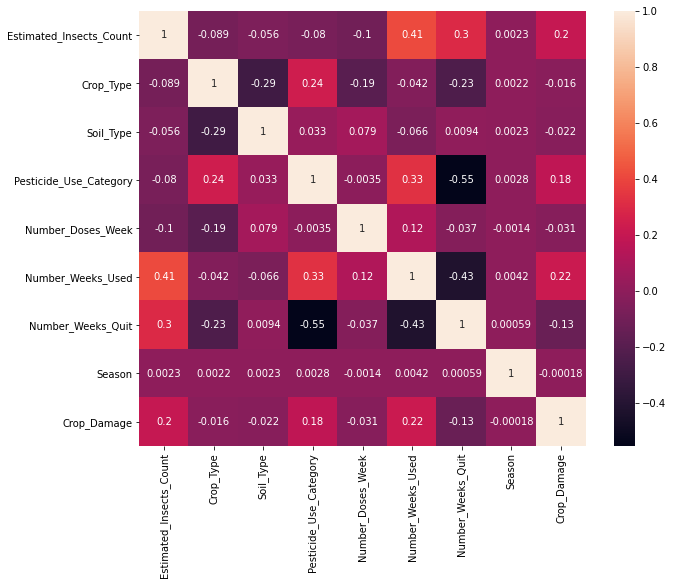

In [358]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

Preprocess data

In [359]:
damage = train.groupby(by=("Crop_Damage")).count().reset_index()
damage

,Crop_Damage,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,74238,74238,74238,74238,74238,74238,74238,74238,74238
1,1,12307,12307,12307,12307,12307,12307,12307,12307,12307
2,2,2313,2313,2313,2313,2313,2313,2313,2313,2313


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


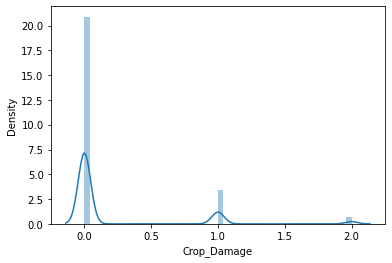

In [360]:
sns.distplot(train['Crop_Damage'])

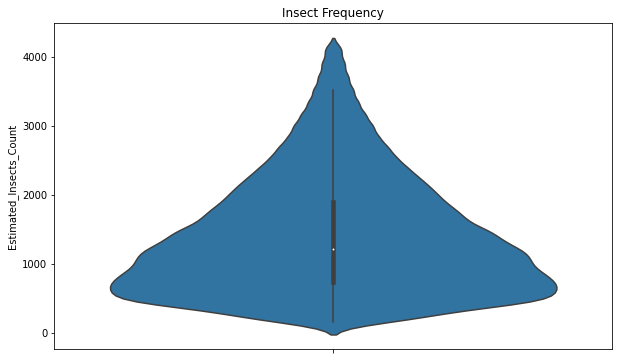

In [361]:
plt.figure(figsize=(10,6))
plt.title("Insect Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Estimated_Insects_Count"])
plt.show()

In [362]:
insect = train.groupby(by=("Estimated_Insects_Count"))["Crop_Damage"].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


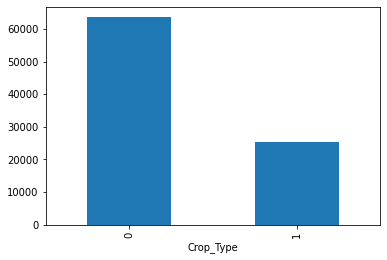

In [363]:
train.groupby('Crop_Type').Crop_Damage.count().plot.bar(ylim=0)
plt.show()

In [364]:
crop = train.groupby(by=("Crop_Type"))["Crop_Damage"].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


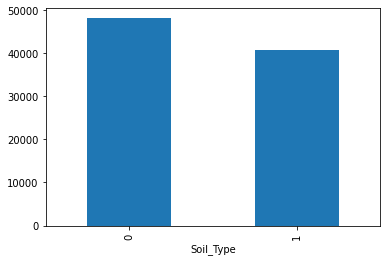

In [365]:
train.groupby('Soil_Type').Crop_Damage.count().plot.bar(ylim=0)
plt.show()

In [366]:
soil = train.groupby(by=("Soil_Type"))["Crop_Damage"].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


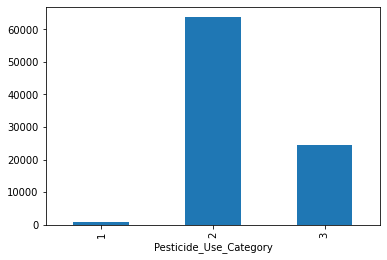

In [367]:
train.groupby('Pesticide_Use_Category').Crop_Damage.count().plot.bar(ylim=0)
plt.show()

In [368]:
pest = train.groupby(by=("Pesticide_Use_Category"))["Crop_Damage"].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


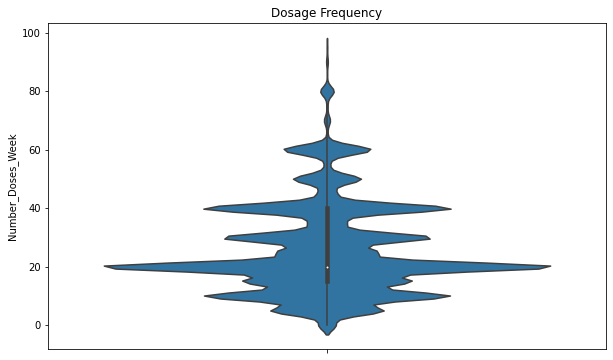

In [369]:
plt.figure(figsize=(10,6))
plt.title("Dosage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Doses_Week"])
plt.show()

In [370]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


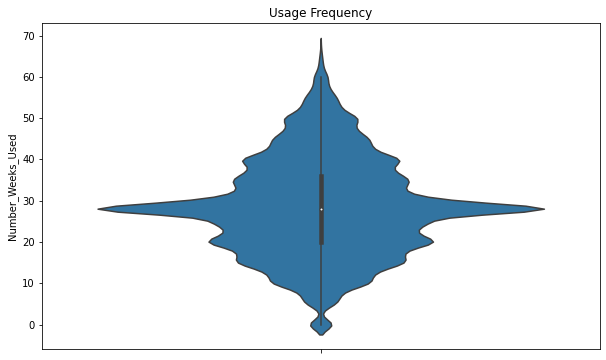

In [371]:
plt.figure(figsize=(10,6))
plt.title("Usage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Used"])
plt.show()

In [372]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

In [373]:
week = train.groupby(by=("Number_Weeks_Used"))["Crop_Damage"].sum().reset_index()
week

,Number_Weeks_Used,Crop_Damage
0,0,771
1,5,33
2,6,15
3,7,18
4,8,32
...,...,...
59,63,21
60,64,21
61,65,23
62,66,8


In [374]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

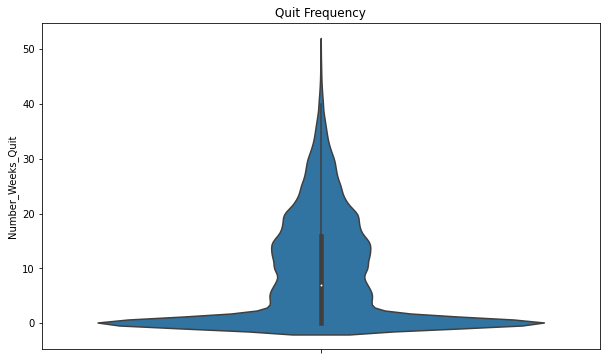

In [375]:
plt.figure(figsize=(10,6))
plt.title("Quit Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Quit"])
plt.show()

In [376]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


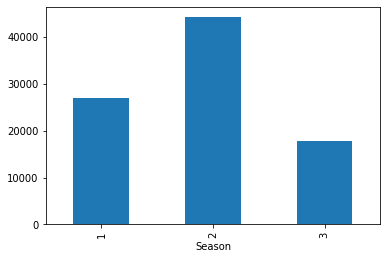

In [377]:
train.groupby('Season').Crop_Damage.count().plot.bar(ylim=0)
plt.show()

In [378]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


Feature selection

In [379]:
#set up features
features=['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week',
          'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']

train_labels = np.array(train.Crop_Damage.values.reshape(-1, 1), dtype=np.float32)

Define X, y and X_test

In [380]:
#define x, y and x_test
X=train[features]
y=train_labels
X_test=test[features]

Min Max Scaler

In [381]:
#scale x, y and x_test
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0, 2), copy=True)

X=mm.fit_transform(X)
y=mm.fit_transform(y)
X_test=mm.fit_transform(X_test)

SMOTE

In [382]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Near Miss

In [383]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

#X, y = nr.fit_sample(X, y)

Split training set for training and testing

In [384]:
#split training set for training and testing
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((200442, 8), (22272, 8), (200442,), (22272,))

Model selection

In [385]:
#Create an XGB classifier and instance of the same
import xgboost as xgb
from xgboost import XGBClassifier

model = XGBClassifier(objective='multi:softmax', learning_rate=.01, n_estimators=2000).fit(X_train, y_train)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [386]:
print(model.score(X_train, y_train))

0.6655740812803704


In [387]:
y_pred = model.predict(X_val)
y_pred

array([0., 2., 2., ..., 1., 2., 1.], dtype=float32)

In [388]:
print(model.score(X_val, y_val))

0.6668462643678161


In [389]:
#importing library and segregation of data as train and test using DMatrix Data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)
#format x, y, and x_test
dX=xgb.DMatrix(X, label=y)
DXtest=xgb.DMatrix(X_test)

In [390]:
#paramaters 
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 5  # the number of training iterations

In [391]:
#model builing using training data
bst = xgb.train(param, dtrain, num_round)
bst

Make predictions

In [392]:
#To calculate predication using test data
y_predict = bst.predict(dtest)
y_predict

array([0., 0., 2., ..., 0., 2., 1.], dtype=float32)

In [393]:
y_predict=y_predict.flatten()
y_val=y_val.flatten()

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_predict})
df

,Actual,Predicted
0,0.0,0.0
1,2.0,0.0
2,2.0,2.0
3,2.0,1.0
4,0.0,0.0
...,...,...
22267,2.0,2.0
22268,1.0,2.0
22269,1.0,0.0
22270,2.0,2.0


In [394]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred), f1_score(y_val, y_pred, average='weighted'), 
recall_score(y_val, y_pred, average='weighted')

0.6668462643678161

In [395]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
 
confusion_matrix(y_val, y_pred)

array([[6050,  904,  470],
       [1402, 3077, 2945],
       [ 380, 1319, 5725]])

In [396]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_val, y_pred))
#Create DataFrame from confmtrx array 
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])


,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,6050,904,470
Other_Causes,1402,3077,2945
Pesticides,380,1319,5725


In [397]:
#Accuracy statistics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

print('Accuracy Score:', metrics.accuracy_score(y_val, y_pred))  
#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.6668462643678161
              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      7424
         1.0       0.58      0.41      0.48      7424
         2.0       0.63      0.77      0.69      7424

    accuracy                           0.67     22272
   macro avg       0.66      0.67      0.66     22272
weighted avg       0.66      0.67      0.66     22272



In [398]:
bst.dump_model('dump.raw.txt')
bst

In [399]:
#Prediction using test data
preds = bst.predict(dtest)
preds

array([0., 0., 2., ..., 0., 2., 1.], dtype=float32)

In [400]:
#Calculating prediction accuracy
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([0, 0, 0, ..., 0, 0, 0])

In [401]:
from sklearn.metrics import precision_score

print(precision_score(y_val, best_preds, average='macro'))

0.1111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Create pkl file

In [402]:
#Saving the model in pkl file
from sklearn.externals import joblib

joblib.dump(bst, 'bst_model.pkl', compress=True)
bst = joblib.load('bst_model.pkl') # load it later

Visualise structure

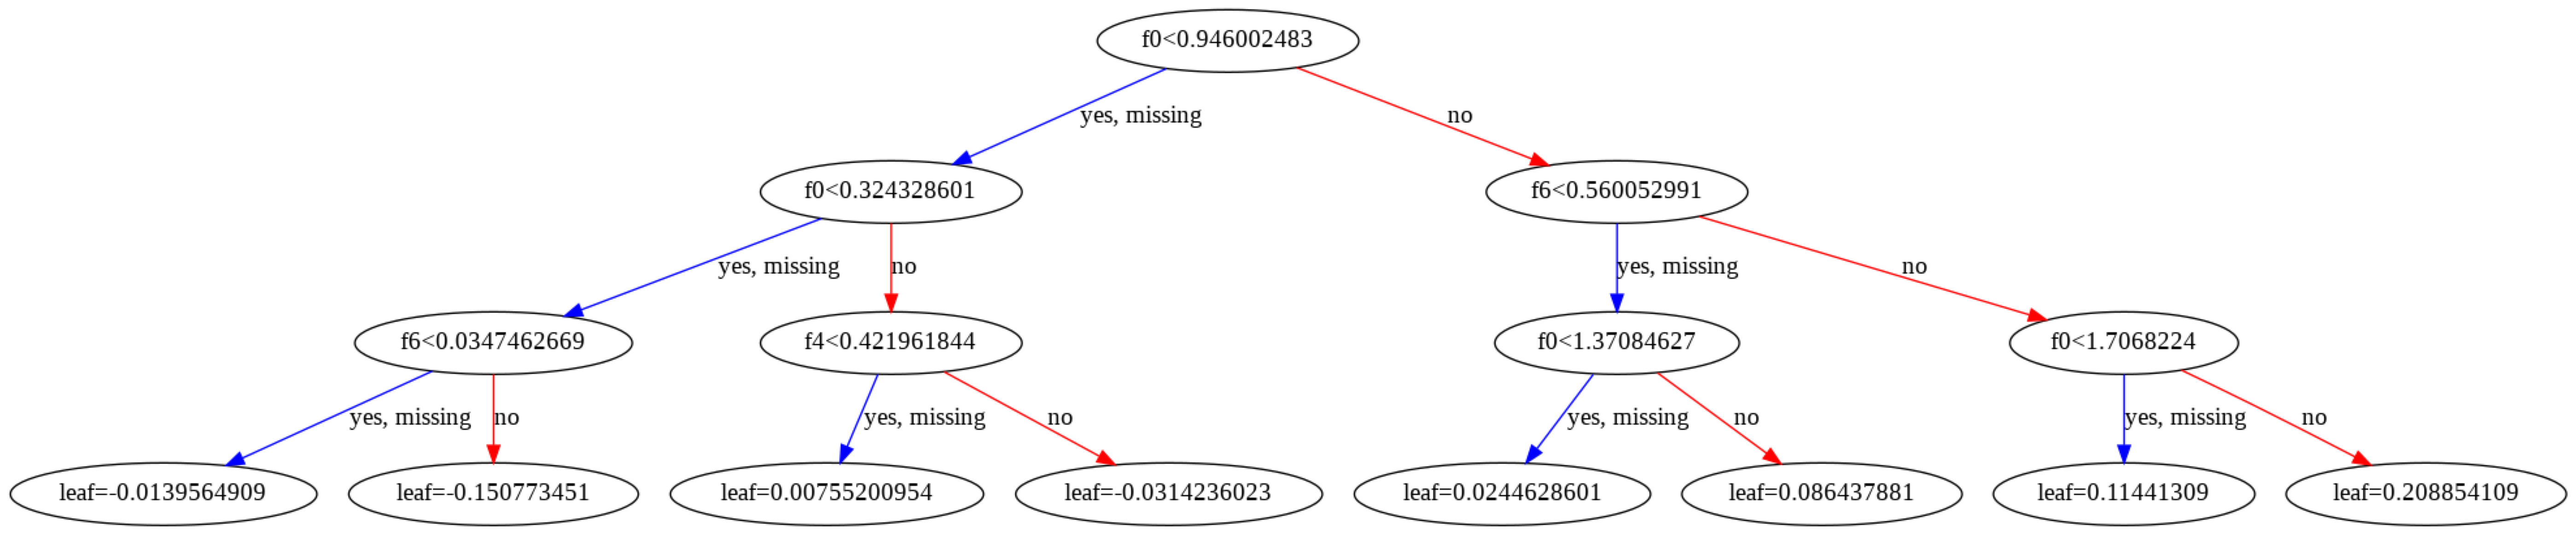

In [403]:
# visualization
xgb.plot_tree(bst, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(100, 75)
fig.savefig('treeCrop.png')

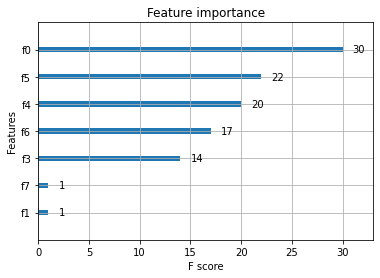

In [404]:
#Feature importance
from xgboost import plot_importance

plot_importance(bst)
plt.show()

Predict on test file

In [405]:
#Prediction using test data
preds = bst.predict(DXtest)
preds

array([1., 1., 2., ..., 1., 1., 1.], dtype=float32)

In [406]:
#Calculating prediction accuracy
final_preds = np.asarray([np.argmax(line) for line in preds])
final_preds

array([0, 0, 0, ..., 0, 0, 0])

In [407]:
test.ID.shape, final_preds.shape

((59310,), (59310,))

Make submission

In [408]:
submission = pd.DataFrame({
        "ID": test.ID,
        "Crop_Damage": final_preds.flatten()
    })
submission.to_csv('submission.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,0
1,F00000007,0
2,F00000011,0
3,F00000013,0
4,F00000014,0
...,...,...
59305,F00155937,0
59306,F00155940,0
59307,F00155941,0
59308,F00155943,0
